In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as Math
from sklearn.datasets import load_svmlight_file
from random import randint

In [0]:
def distance(data,v):
  distance=[]
  for i in range(0,data.shape[0]):
    d= np.sqrt(np.sum((data[i]-v).multiply(data[i]-v)))
    distance.append(d)
  return distance

In [0]:
def kmeans(data,k,epsilon,epoch):
  size=data.shape[0]
  randval=randint(0,size-1)
  cluster=[]
  cluster.append(data[randval])

  for i in range(1,k):
    distanceL=0*size
    for j in range(0,i):
      dlist=distance(data,cluster[j])
      distanceL=np.add(distanceL,dlist)
    highest=np.argmax(distanceL)
    cluster.append(data[highest])

  for e in range(0,epoch):
    clusterStack=[]
    old_cluster=cluster.copy()
    for j in range(0,k):
      clusterStack.append([])
    for i in range(0,size):
      distances=[]
      for j in range (0,k):
        distances.append(np.sqrt(np.sum((data[i]-cluster[j]).multiply(data[i]-cluster[j]))))
      clusterStack[np.argmin(distances)].append(data[i])


    for j in range(0,k):
      sumValue=0
      for i in range (0,len(clusterStack[j])):
        sumValue=sumValue+clusterStack[j][i]
      if(len(clusterStack[j])!=0):
        cluster[j]=sumValue/len(clusterStack[j])

    c=0
    for i in range (0,k):
      for j in range (0,k):
        if(abs((old_cluster[i]-cluster[j]).sum())<=epsilon):
          c=c+1
    if(c >= k):
      dist=0
      for i in range(0,k):
        for j in range(0,len(clusterStack[i])):
          dist=dist+(np.sqrt(np.sum((clusterStack[i][j]-cluster[i]).multiply(clusterStack[i][j]-cluster[i]))))
      return cluster,old_cluster,e,"Converged",dist
  return cluster,old_cluster,e," No Convergence",0

In [0]:
data=load_svmlight_file('iris.scale.txt')
x=data[0]
y=data[1]

In [0]:
k=range(1,7)
convergenceList=[]
distortionList=[]
for i in k:
  cluster,old_cluster,epoch,result,distortion=kmeans(x,i,0.001,50)
  convergenceList.append(epoch)
  distortionList.append(distortion)

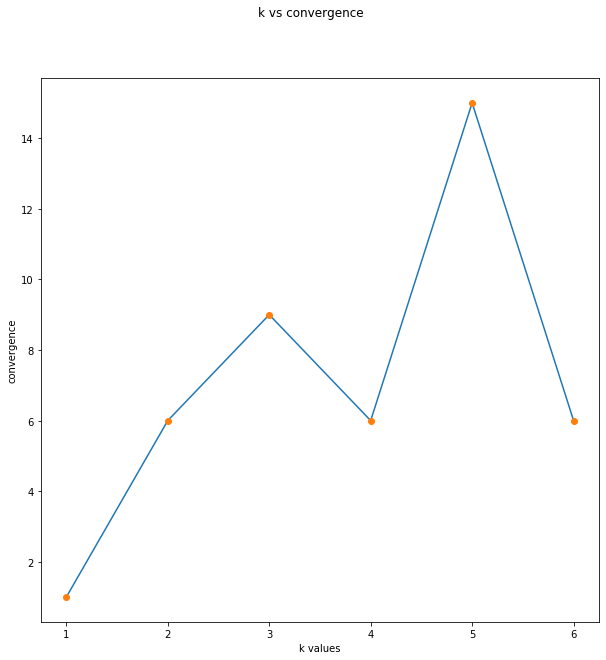

In [6]:
fig,axs=plt.subplots(1,1,figsize=(10,10))
fig.suptitle("k vs convergence")
axs.plot(k,convergenceList)
axs.plot(k,convergenceList,'o')
axs.set_xlabel('k values')
axs.set_ylabel('convergence')
plt.show()

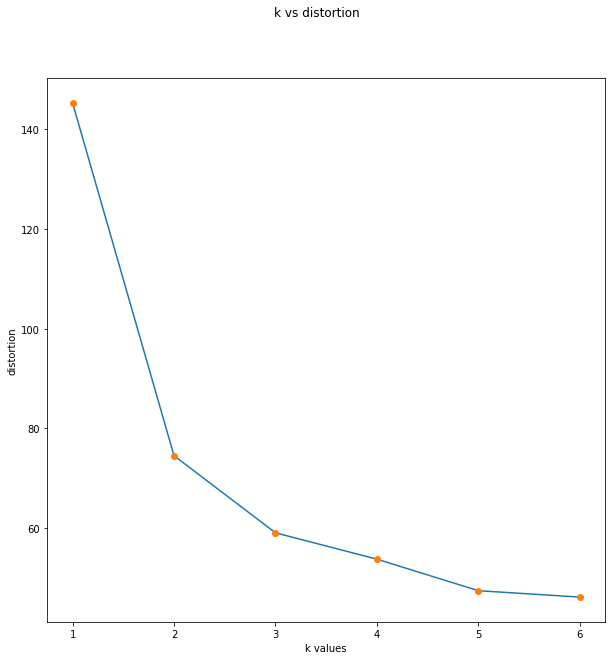

In [7]:
fig,axs=plt.subplots(1,1,figsize=(10,10))
fig.suptitle("k vs distortion")
axs.plot(k,distortionList)
axs.plot(k,distortionList,'o')
axs.set_xlabel('k values')
axs.set_ylabel('distortion')
plt.show()


When k=4 there is covergence and its lower compared to others.On the other hand,for k vs distortion graph there is elbow curve.

